In [1]:
# Importing necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob  # For sentiment analysis
import pandas as pd
import re  # For text cleaning
import matplotlib.pyplot as plt


In [2]:
# Download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Step 1: Data Collection
# Download Twitter sentiment dataset from Kaggle and unzip it
!kaggle datasets download -d kazanova/sentiment140  # Replace with your preferred dataset
!unzip sentiment140.zip

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 61% 49.0M/80.9M [00:00<00:00, 260MB/s]
100% 80.9M/80.9M [00:00<00:00, 281MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [34]:
# Load the dataset
# Assuming sentiment140 dataset
# Columns: target, id, date, flag, user, tweet
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)


In [35]:
data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [41]:

data = data[['tweet', 'target']]  # Keep only relevant columns

In [42]:
data

,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [6]:
# Step 2: Text Preprocessing
# Clean text: remove special characters, URLs, and extra spaces
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [33]:
clean_text

<function __main__.clean_text(text)>

In [7]:
data['cleaned_tweets'] = data['tweet'].apply(clean_text)

In [13]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
data['tokens'] = data['cleaned_tweets'].apply(word_tokenize)

In [22]:
data.iloc[0]  # Access the first row

,0
tweet,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
target,0
cleaned_tweets,switchfoot Awww thats a bummer You shoulda got...
tokens,"[switchfoot, Awww, thats, a, bummer, You, shou..."
filtered_tokens,"[switchfoot, Awww, thats, bummer, shoulda, got..."
stemmed_tokens,"[switchfoot, awww, that, bummer, shoulda, got,..."
sentiment,positive


In [15]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

data['filtered_tokens'] = data['tokens'].apply(remove_stopwords)

In [16]:
# Step 3: Stemming (optional, can be skipped for sentiment analysis)
ps = PorterStemmer()
def stem_tokens(tokens):
    return [ps.stem(word) for word in tokens]

data['stemmed_tokens'] = data['filtered_tokens'].apply(stem_tokens)

In [28]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
ps

<PorterStemmer>

In [17]:
# Step 4: Sentiment Analysis
# Using TextBlob for sentiment scoring
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

data['sentiment'] = data['cleaned_tweets'].apply(analyze_sentiment)

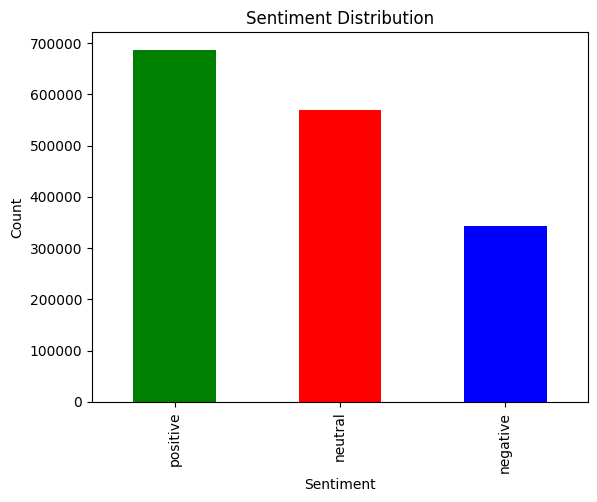

In [31]:
# Step 5: Visualization
# Plot sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [32]:
data

,tweet,target,cleaned_tweets,tokens,filtered_tokens,stemmed_tokens,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot Awww thats a bummer You shoulda got...,"[switchfoot, Awww, thats, a, bummer, You, shou...","[switchfoot, Awww, thats, bummer, shoulda, got...","[switchfoot, awww, that, bummer, shoulda, got,...",positive
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his Facebook by t...,"[is, upset, that, he, cant, update, his, Faceb...","[upset, cant, update, Facebook, texting, might...","[upset, cant, updat, facebook, text, might, cr...",neutral
2,@Kenichan I dived many times for the ball. Man...,0,Kenichan I dived many times for the ball Manag...,"[Kenichan, I, dived, many, times, for, the, ba...","[Kenichan, dived, many, times, ball, Managed, ...","[kenichan, dive, mani, time, ball, manag, save...",positive
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]",positive
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...,"[nationwideclass, no, its, not, behaving, at, ...","[nationwideclass, behaving, im, mad, cant, see]","[nationwideclass, behav, im, mad, cant, see]",negative
...,...,...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,4,Just woke up Having no school is the best feel...,"[Just, woke, up, Having, no, school, is, the, ...","[woke, school, best, feeling, ever]","[woke, school, best, feel, ever]",positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,TheWDBcom Very cool to hear old Walt interviews,"[TheWDBcom, Very, cool, to, hear, old, Walt, i...","[TheWDBcom, cool, hear, old, Walt, interviews]","[thewdbcom, cool, hear, old, walt, interview]",positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,Are you ready for your MoJo Makeover Ask me fo...,"[Are, you, ready, for, your, MoJo, Makeover, A...","[ready, MoJo, Makeover, Ask, details]","[readi, mojo, makeov, ask, detail]",positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,Happy th Birthday to my boo of alll time Tupac...,"[Happy, th, Birthday, to, my, boo, of, alll, t...","[Happy, th, Birthday, boo, alll, time, Tupac, ...","[happi, th, birthday, boo, alll, time, tupac, ...",positive
